In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

'pt_BR.utf8'

In [52]:
def create_graph_line_group(df, title, col_x, col_y, col_group, x_label, y_label, lim_min, lim_max):
    ax = sns.catplot(x=col_x, y=col_y, hue=col_group, height=4, aspect=2,
                 capsize=.2, kind="point", data=df)
    
    # for ind_i, safra in enumerate(list(sorted(set(df[col_x].values)))):
    #     for num_bin in list(sorted(set(df[col_group].values))):
    #         value = df[(df[col_x]==safra)&(df[col_group]==num_bin)][col_y].values[0]
    #         ax.ax.text(ind_i, value, f'{value:.2f}', backgroundcolor='white', color='black', ha='center', va='center', zorder=5)
            
    ax.set(xlabel = x_label, ylabel = y_label)
    # plt.legend(title='Bin', loc='upper right', bbox_to_anchor=(1.2, 0.9))
    plt.title(title, fontsize=10)
    ax.despine(left=True)
    plt.xticks(rotation=45)
    plt.ylim(lim_min, lim_max)
    plt.show()
    #ax.savefig(f'woe_{feature}.png')

In [3]:
def create_graph_line(df, title, col_x, col_y, x_label, y_label, lim_min, lim_max):
    ax = sns.catplot(x=col_x, y=col_y, height=4, aspect=2, capsize=.2, kind="point", data=df, legend=False)
    
    for ind, safra in enumerate(list(sorted(set(df[col_x].values)))):
        value = df[df[col_x]==safra][col_y].values[0]
        ax.ax.text(ind, value, f'{value:.2f}', backgroundcolor='white', color='black', ha='center', va='center')
    
    ax.set(xlabel = x_label, ylabel = y_label)
    plt.title(title)
    ax.despine(left=True)
    plt.xticks(rotation=45)
    plt.ylim(lim_min, lim_max)
    plt.show()
    #ax.savefig(f'woe_{feature}.png')

In [4]:
def create_graph_bar(df, col_x, col_y, x_label, y_label, title):
    aux = sns.barplot(x=col_x, y=col_y, data=df)
    aux.set(xlabel = x_label, ylabel = y_label)
    plt.title(title)
    
    for index, row in df.iterrows():
        aux.text(row.name,row[col_y], row[col_y], color='black', ha="center")
    
    plt.show()

# Carregar Dados

In [5]:
df_estoque_ruptura = pd.read_csv('../data/processed/dados_estoque_ruptura.csv')
df_estoque_ruptura['dt_estoque'] = pd.to_datetime(df_estoque_ruptura['dt_estoque'])
df_estoque_ruptura['ano_mes'] = df_estoque_ruptura['dt_estoque'].dt.strftime('%Y-%m')
df_estoque_ruptura['is_ruptura'] = df_estoque_ruptura['is_ruptura'].apply(int)
df_estoque_ruptura.head()

,key_loja,cod_produto,dt_estoque,qt_estoque,is_ruptura,ano_mes
0,1,1428,2024-01-01,108.0,0,2024-01
1,1,1428,2024-01-02,108.0,0,2024-01
2,1,1428,2024-01-03,108.0,0,2024-01
3,1,1428,2024-01-04,108.0,0,2024-01
4,1,1428,2024-01-05,108.0,0,2024-01


In [6]:
df_similares = pd.read_csv('../data/raw/tb_similares.csv')
df_similares.rename(columns={"cod_material": "cod_produto"}, inplace=True)
df_similares.head()

,cod_produto,cod_material_recom,ranking
0,48635,25472,1
1,50651,74932,1
2,48062,77684,1
3,49893,48730,1
4,49943,84203,1


In [7]:
df_vendas = pd.read_csv('../data/processed/df_vendas_consolidado.csv')
df_vendas['dt_venda'] = pd.to_datetime(df_vendas['dt_venda'])
df_vendas.head()

,dt_venda,key_loja,cod_produto,qtd_vendas,vlr_venda_tabelado_mean,vlr_desconto_mean,categoria_produto,sub_categoria_produto,linha_produto
0,2024-01-02,1,48062,1,284.70,0.0,217.0,422944,306420
1,2024-01-02,1,48635,1,419.70,0.0,955075.0,483679,284036
2,2024-01-02,1,82060,1,1017.00,191.1,157293.0,483679,120030
3,2024-01-02,2,1650,1,167.70,36.0,217.0,422944,731659
4,2024-01-02,2,48060,2,584.55,0.0,217.0,422944,306420


In [8]:
df_tmp = df_estoque_ruptura.merge(df_similares, on='cod_produto', how='left')

df_estoque_ruptura_similar = df_tmp.merge(
    df_estoque_ruptura,
    left_on=['cod_material_recom', 'key_loja', 'dt_estoque'],
    right_on=['cod_produto', 'key_loja', 'dt_estoque'],
    how='left',
    suffixes=('', '_similar')
)

df_estoque_ruptura_similar['similar_disponivel'] = df_estoque_ruptura_similar['qt_estoque_similar'] > 0
df_estoque_ruptura_similar['similar_disponivel'] = df_estoque_ruptura_similar['similar_disponivel'].apply(int)

df_estoque_ruptura_similar.drop(columns=['cod_material_recom', 'is_ruptura_similar', 'ano_mes_similar'], inplace=True)

df_estoque_ruptura_similar.head()

,key_loja,cod_produto,dt_estoque,qt_estoque,is_ruptura,ano_mes,ranking,cod_produto_similar,qt_estoque_similar,similar_disponivel
0,1,1428,2024-01-01,108.0,0,2024-01,1.0,1650.0,102.0,1
1,1,1428,2024-01-01,108.0,0,2024-01,2.0,1640.0,83.0,1
2,1,1428,2024-01-01,108.0,0,2024-01,3.0,48282.0,335.0,1
3,1,1428,2024-01-02,108.0,0,2024-01,1.0,1650.0,102.0,1
4,1,1428,2024-01-02,108.0,0,2024-01,2.0,1640.0,83.0,1


# 1. Os similares estão ajudando a evitar perda de vendas em situações de ruptura?

## 1.1. Quantas rupturas ocorreram? (Geral) -> OK

In [13]:
total_rupturas = df_estoque_ruptura['is_ruptura'].sum()
proporcao = np.round((total_rupturas/df_estoque_ruptura.shape[0])*100, 2)
print(f"Total de eventos de ruptura: {total_rupturas} ({proporcao}% dos registros de estoque)")

Total de eventos de ruptura: 109827 (38.86% dos registros de estoque)


#### GERAL

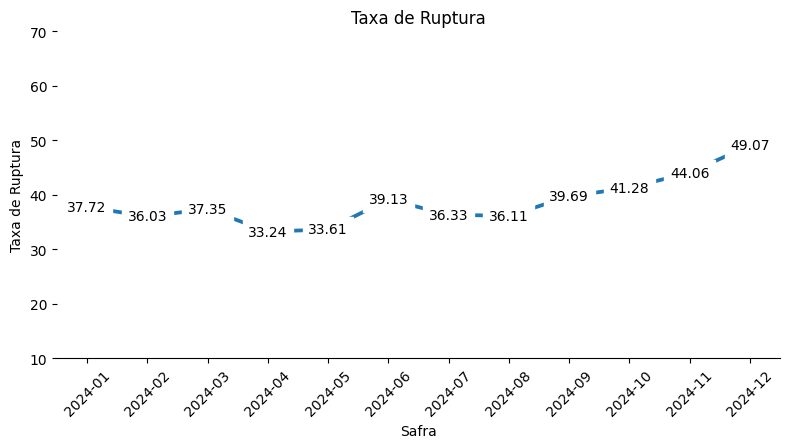

In [19]:
ruptura_por_safra = (
    df_estoque_ruptura.groupby('ano_mes')['is_ruptura']
    .agg(qtd_rupturas='sum', total='count')
    .assign(taxa_ruptura=lambda x: np.round((x['qtd_rupturas'] / x['total'])*100,2))
    .reset_index()
    )
create_graph_line(ruptura_por_safra, 'Taxa de Ruptura', 'ano_mes', 'taxa_ruptura', 'Safra', 'Taxa de Ruptura', 10, 70)

- Em 2024-09 apresentou uma tendencia forte de ruptura com o maior Pico em 2024-12 que acredito ter haver com a época do natal

#### LOJA

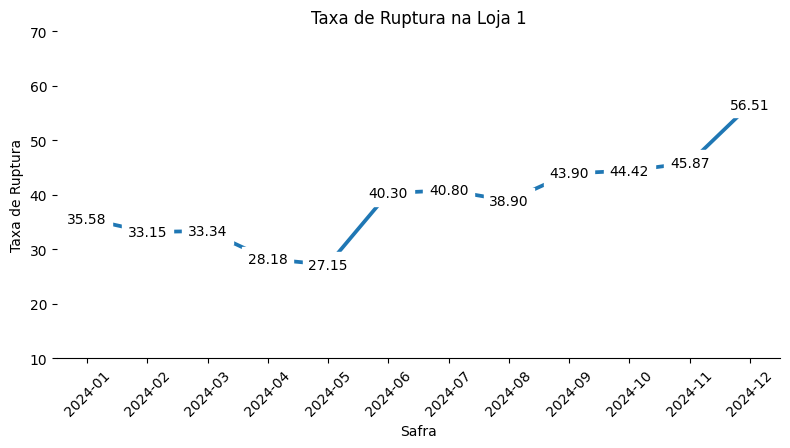

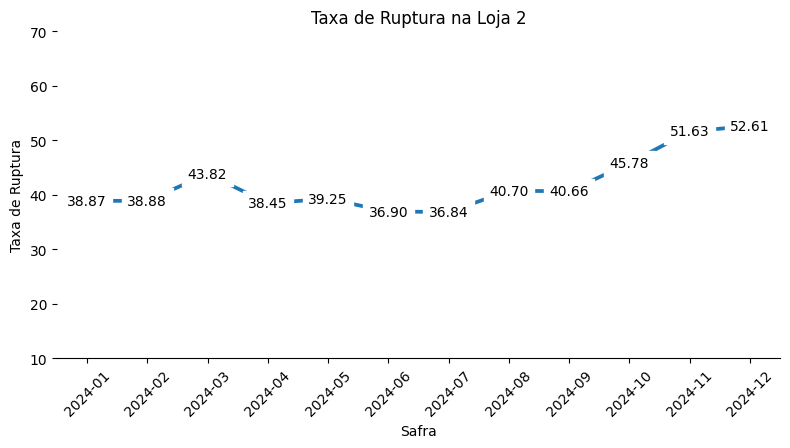

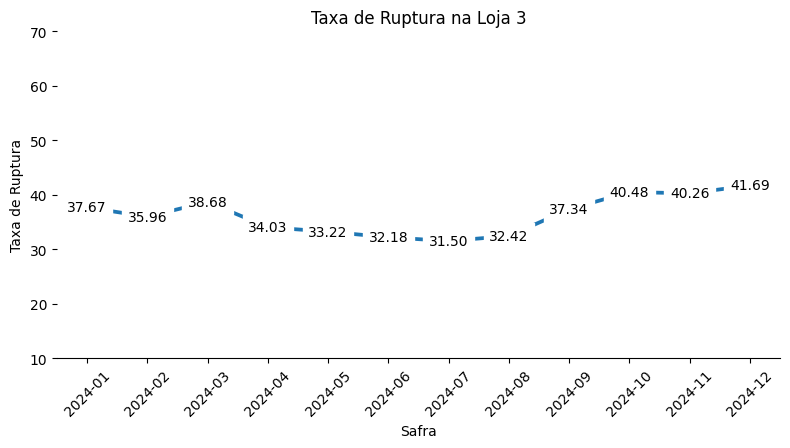

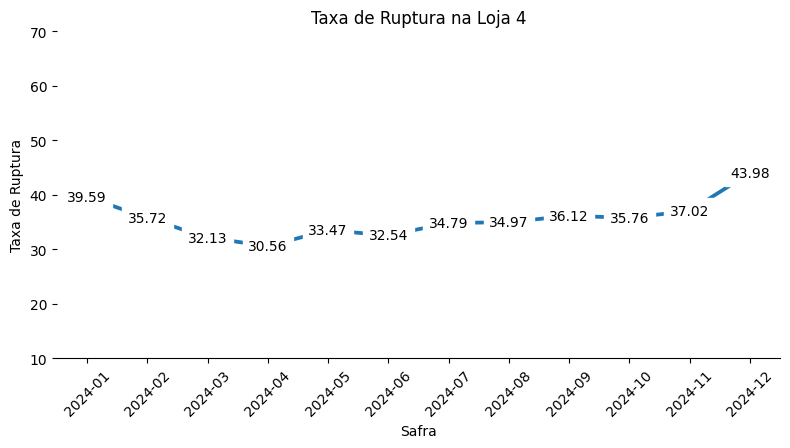

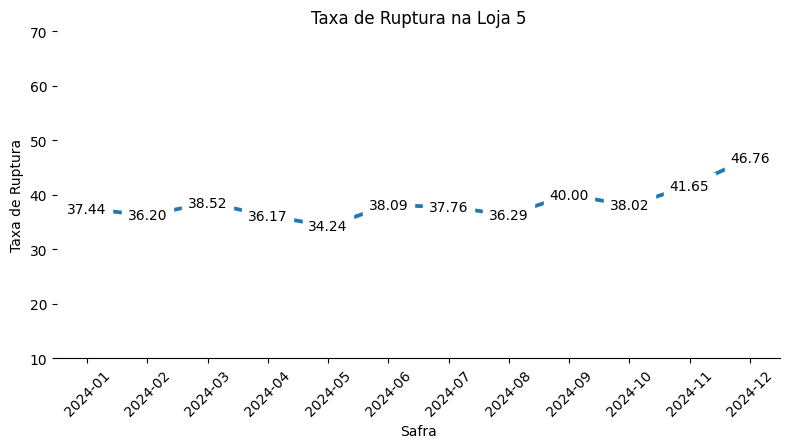

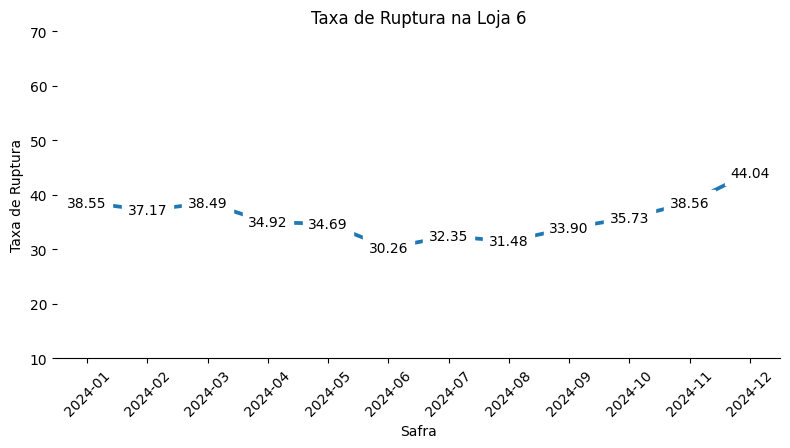

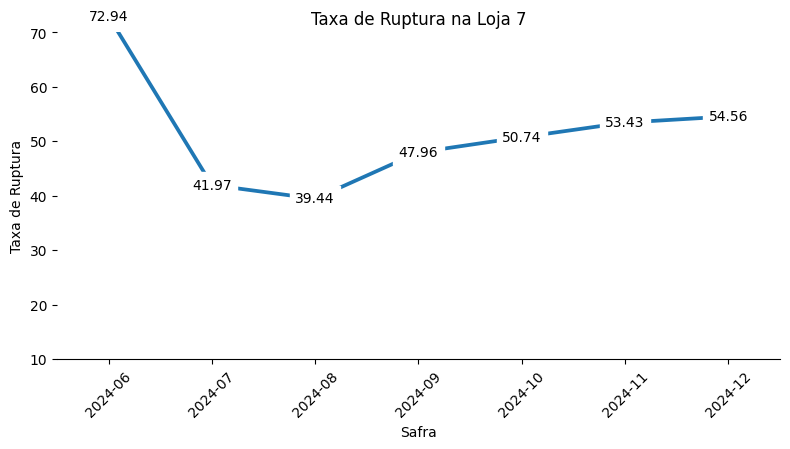

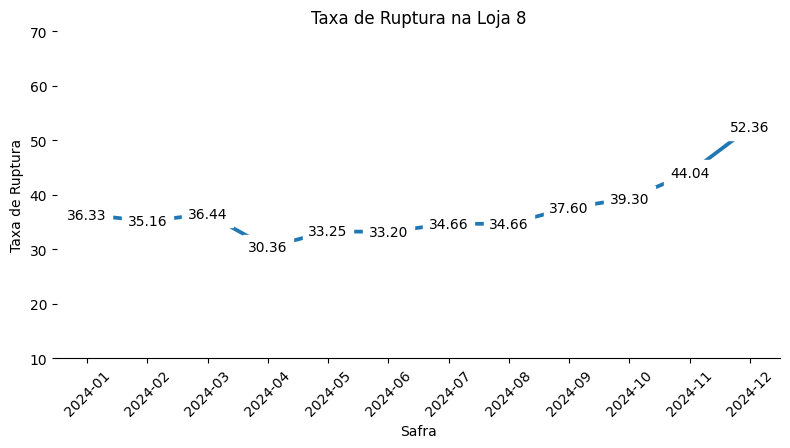

In [22]:
ruptura_por_safra_loja = (
    df_estoque_ruptura.groupby(['ano_mes', 'key_loja'])['is_ruptura']
    .agg(qtd_rupturas='sum', total='count')
    .assign(taxa_ruptura=lambda x: np.round((x['qtd_rupturas'] / x['total'])*100,2))
    .reset_index()
    )

lojas = sorted(ruptura_por_safra_loja['key_loja'].unique())

for lj in lojas:
    df_tmp = ruptura_por_safra_loja[ruptura_por_safra_loja['key_loja']==lj]
    create_graph_line(df_tmp, f'Taxa de Ruptura na Loja {lj}', 'ano_mes', 'taxa_ruptura', 'Safra', 'Taxa de Ruptura', 10, 70)

- A maioria das lojas apresentaram a tedencia de alta taxa de ruptura de 2024-09
- A loja 1 já vinha apresentando tendencia de alta desde 2024-05 pode ser por conta do seu tamanho
- A loja 7 apresentou uma alta taxa de ruptura em 2024-06 que foi o mesmo período que começou aparecer nos registros de estoque
esse comportamento pode ter relação por ser uma loja nova.

In [ ]:
#### LOJA + SKU

## 1.2. Quantas dessas rupturas tinham similares recomendados disponíveis em estoque? -> OK

In [76]:
df_ruptura_com_similar = df_estoque_ruptura_similar[(df_estoque_ruptura_similar['is_ruptura']==1)&(~df_estoque_ruptura_similar['ranking'].isnull())]
df_ruptura_com_similar.head()

,key_loja,cod_produto,dt_estoque,qt_estoque,is_ruptura,ano_mes,ranking,cod_produto_similar,qt_estoque_similar,similar_disponivel
969,1,1428,2024-11-19,0.0,1,2024-11,1.0,1650.0,10.0,1
970,1,1428,2024-11-19,0.0,1,2024-11,2.0,1640.0,13.0,1
971,1,1428,2024-11-19,0.0,1,2024-11,3.0,48282.0,159.0,1
972,1,1428,2024-11-20,0.0,1,2024-11,1.0,1650.0,10.0,1
973,1,1428,2024-11-20,0.0,1,2024-11,2.0,1640.0,13.0,1


In [78]:
df_ruptura_com_similar[df_ruptura_com_similar['similar_disponivel']==1]['ranking'].value_counts()

ranking
1.0    10517
2.0     8543
3.0     7038
Name: count, dtype: int64

In [60]:
df_ruptura_com_similar['similar_disponivel'].value_counts(normalize=True)*100

similar_disponivel
0    57.069303
1    42.930697
Name: proportion, dtype: float64

#### GERAL

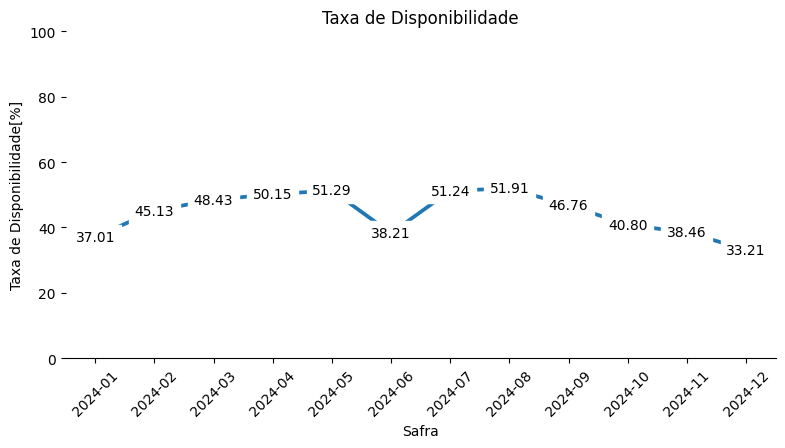

In [61]:
disponibilidade_por_safra = (
    df_ruptura_com_similar.groupby('ano_mes', as_index=False)['similar_disponivel']
    .agg(qtd_similares_disponiveis='sum', total='count')
    .assign(taxa_cobertura=lambda x: np.round((x['qtd_similares_disponiveis'] / x['total'])*100,2))
)

create_graph_line(disponibilidade_por_safra, 'Taxa de Disponibilidade', 'ano_mes', 'taxa_cobertura', 'Safra', 'Taxa de Disponibilidade[%]', 0, 100)

#### LOJA

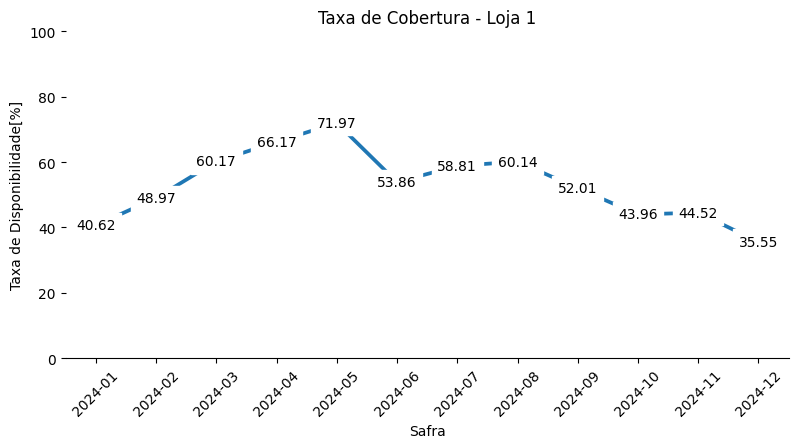

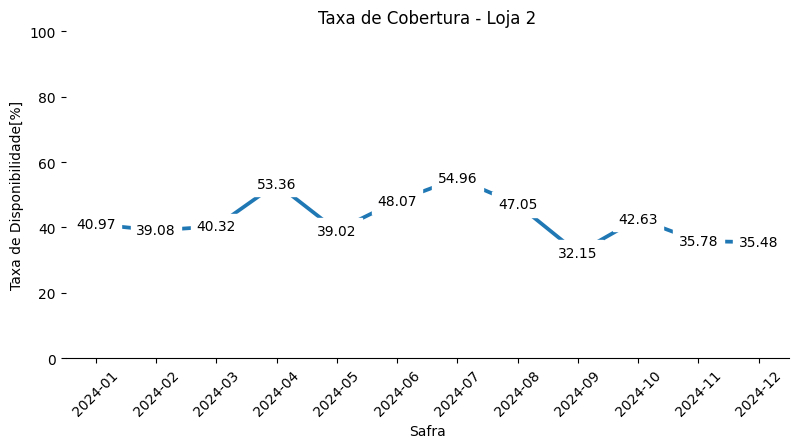

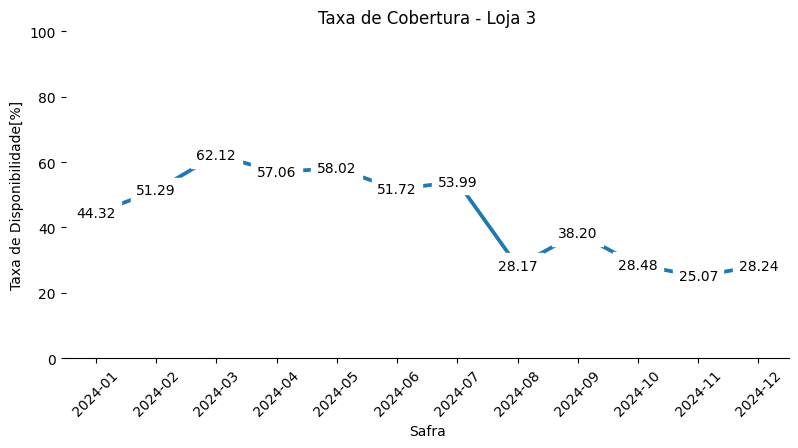

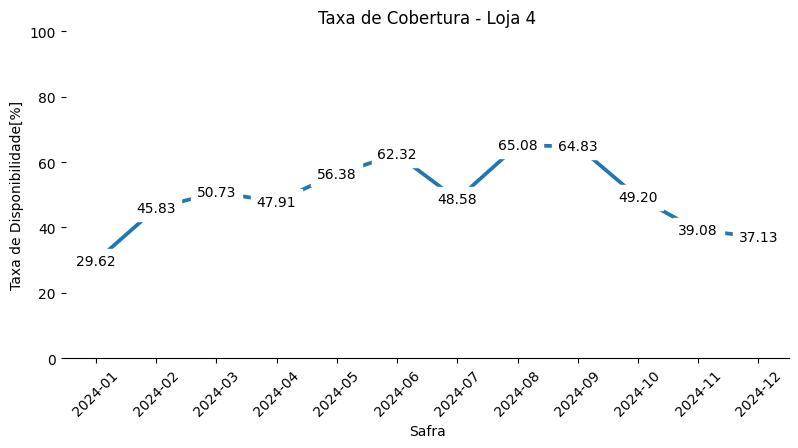

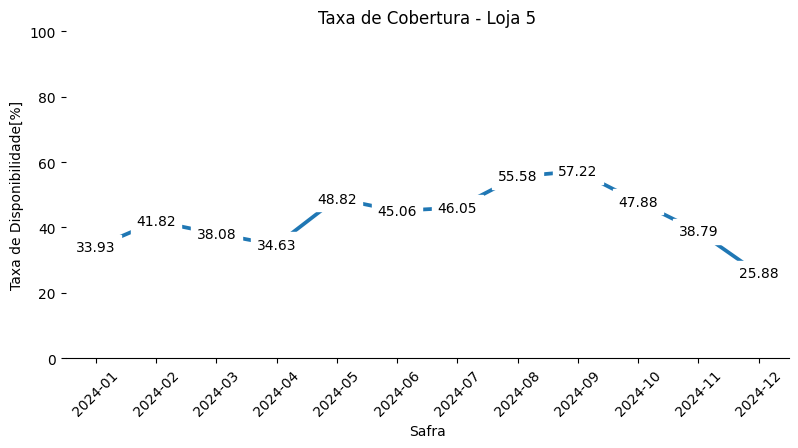

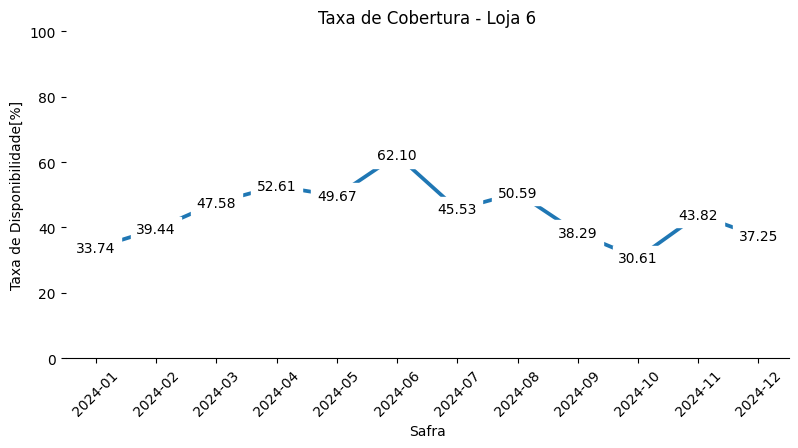

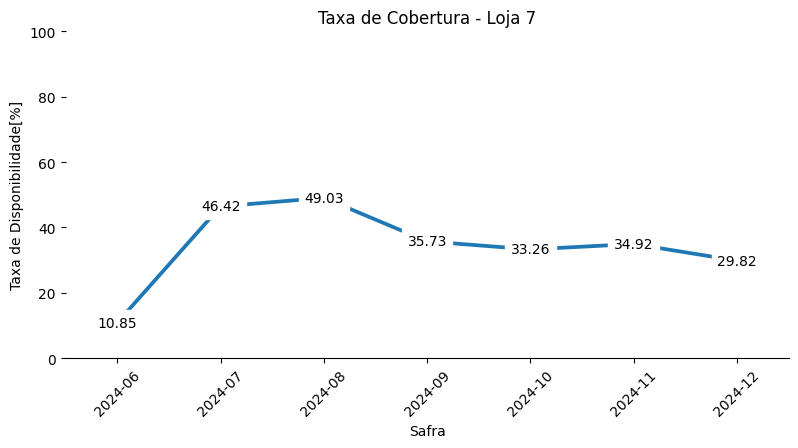

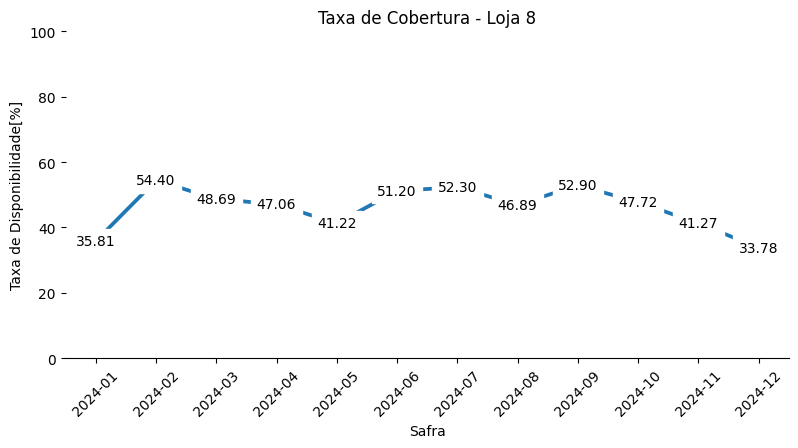

In [62]:
disponibilidade_por_safra_loja = (
    df_ruptura_com_similar.groupby(['ano_mes', 'key_loja'], as_index=False)['similar_disponivel']
    .agg(qtd_similares_disponiveis='sum', total='count')
    .assign(taxa_disponibilidade=lambda x: np.round((x['qtd_similares_disponiveis'] / x['total'])*100,2))
    )

lojas = sorted(disponibilidade_por_safra_loja['key_loja'].unique())

for lj in lojas:
    df_tmp = disponibilidade_por_safra_loja[disponibilidade_por_safra_loja['key_loja']==lj]
    create_graph_line(df_tmp, f'Taxa de Cobertura - Loja {lj}', 'ano_mes', 'taxa_disponibilidade', 'Safra', 'Taxa de Disponibilidade[%]', 0, 100)

In [ ]:
#### Top 3 SKU

#### Qual Rankings possue maior disponibilidade?

In [79]:
df_ruptura_com_similar

,key_loja,cod_produto,dt_estoque,qt_estoque,is_ruptura,ano_mes,ranking,cod_produto_similar,qt_estoque_similar,similar_disponivel
969,1,1428,2024-11-19,0.0,1,2024-11,1.0,1650.0,10.0,1
970,1,1428,2024-11-19,0.0,1,2024-11,2.0,1640.0,13.0,1
971,1,1428,2024-11-19,0.0,1,2024-11,3.0,48282.0,159.0,1
972,1,1428,2024-11-20,0.0,1,2024-11,1.0,1650.0,10.0,1
973,1,1428,2024-11-20,0.0,1,2024-11,2.0,1640.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...
475518,8,84068,2024-12-27,0.0,1,2024-12,1.0,83772.0,0.0,0
475519,8,84068,2024-12-28,0.0,1,2024-12,1.0,83772.0,0.0,0
475520,8,84068,2024-12-29,0.0,1,2024-12,1.0,83772.0,0.0,0
475521,8,84068,2024-12-30,0.0,1,2024-12,1.0,83772.0,0.0,0


In [85]:
df_ruptura_com_similar

,key_loja,cod_produto,dt_estoque,qt_estoque,is_ruptura,ano_mes,ranking,cod_produto_similar,qt_estoque_similar,similar_disponivel
969,1,1428,2024-11-19,0.0,1,2024-11,1.0,1650.0,10.0,1
970,1,1428,2024-11-19,0.0,1,2024-11,2.0,1640.0,13.0,1
971,1,1428,2024-11-19,0.0,1,2024-11,3.0,48282.0,159.0,1
972,1,1428,2024-11-20,0.0,1,2024-11,1.0,1650.0,10.0,1
973,1,1428,2024-11-20,0.0,1,2024-11,2.0,1640.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...
475518,8,84068,2024-12-27,0.0,1,2024-12,1.0,83772.0,0.0,0
475519,8,84068,2024-12-28,0.0,1,2024-12,1.0,83772.0,0.0,0
475520,8,84068,2024-12-29,0.0,1,2024-12,1.0,83772.0,0.0,0
475521,8,84068,2024-12-30,0.0,1,2024-12,1.0,83772.0,0.0,0


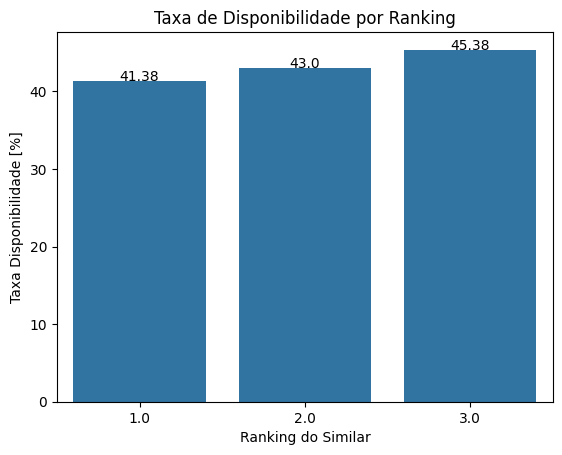

In [63]:
disponibilidade_por_ranking = (
    df_ruptura_com_similar.groupby(['ranking'], as_index=False)['similar_disponivel']
    .agg(qtd_similares_disponiveis='sum', total='count')
    .assign(taxa_disponibilidade=lambda x: np.round((x['qtd_similares_disponiveis'] / x['total'])*100,2))
    )

create_graph_bar(disponibilidade_por_ranking, 'ranking', 'taxa_disponibilidade', 'Ranking do Similar', 
                 'Taxa Disponibilidade [%]', 'Taxa de Disponibilidade por Ranking')

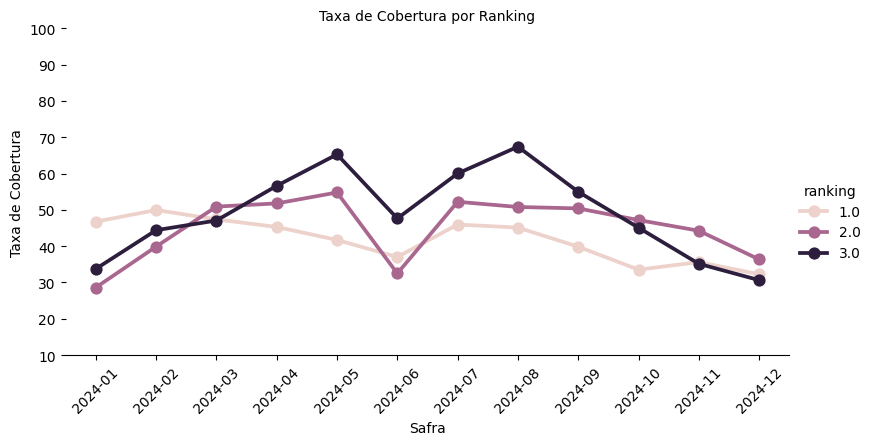

In [64]:
taxa_disponibilidade_por_safra_ranking = (
    df_ruptura_com_similar.groupby(['ano_mes', 'ranking'], as_index=False)['similar_disponivel']
    .agg(qtd_similares_disponiveis='sum', total='count')
    .assign(taxa_disponibilidade=lambda x: np.round((x['qtd_similares_disponiveis'] / x['total'])*100,2))
    )
taxa_disponibilidade_por_safra_ranking

create_graph_line_group(taxa_disponibilidade_por_safra_ranking, 'Taxa de Cobertura por Ranking', 
                        'ano_mes', 'taxa_disponibilidade', 'ranking', 'Safra', 'Taxa de Cobertura', 10, 100)

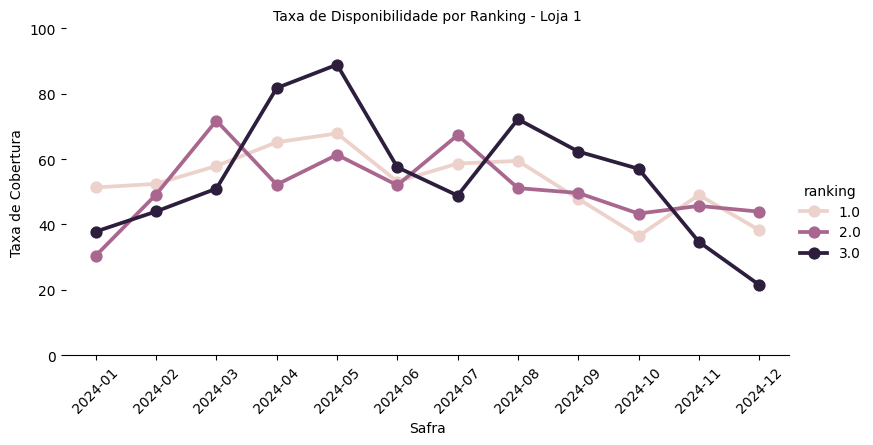

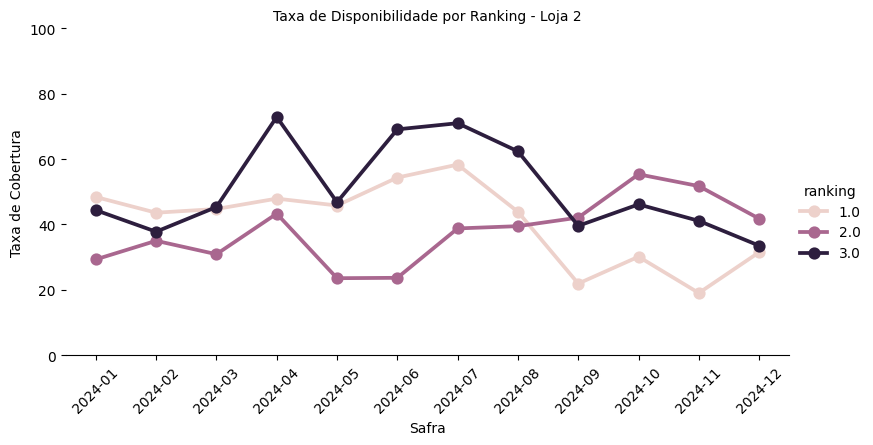

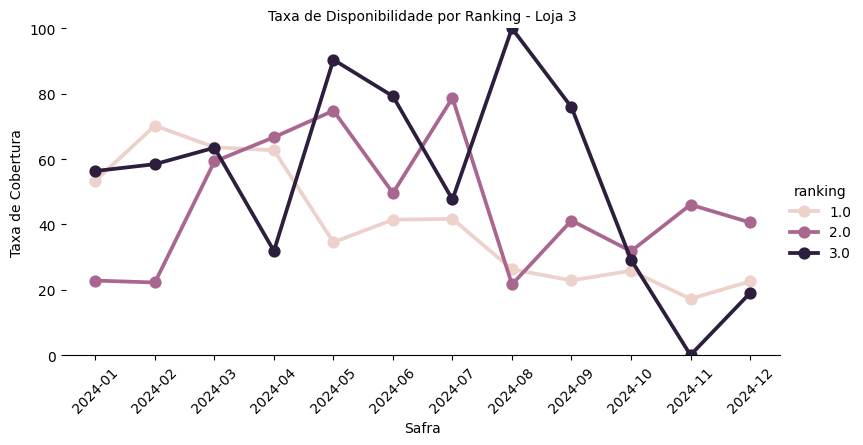

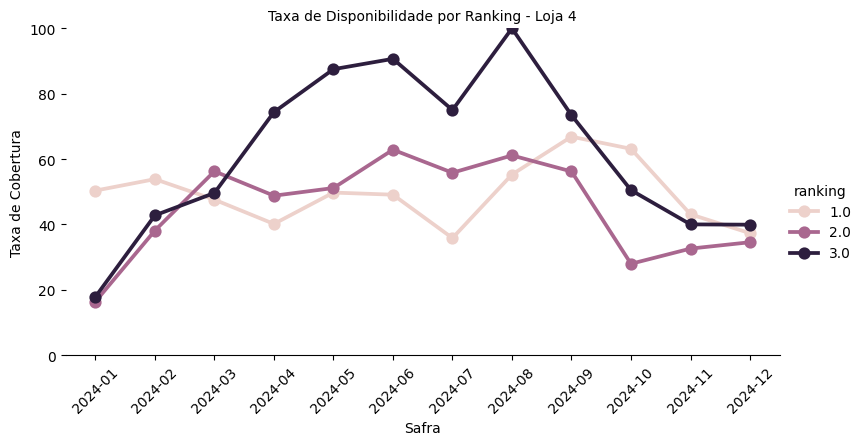

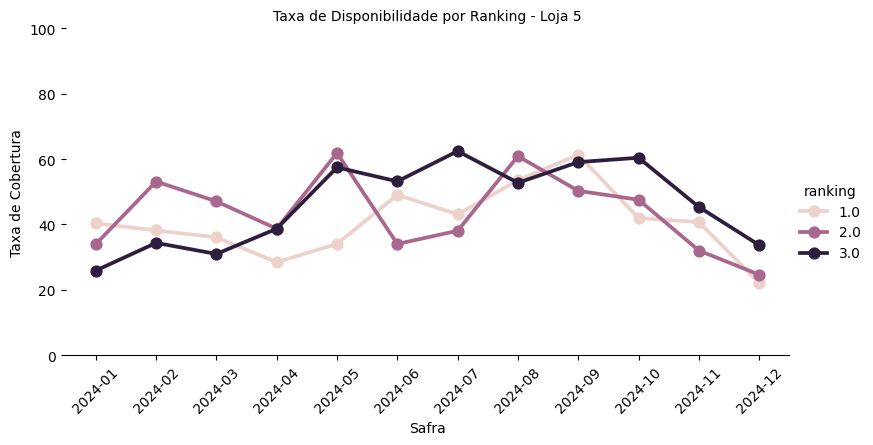

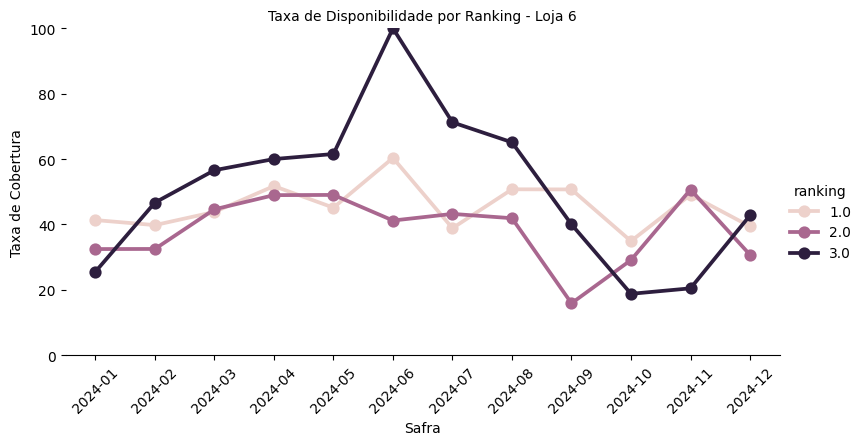

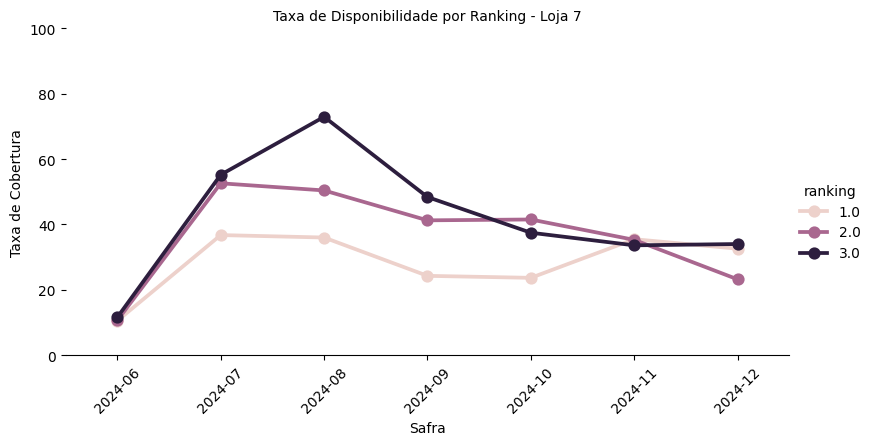

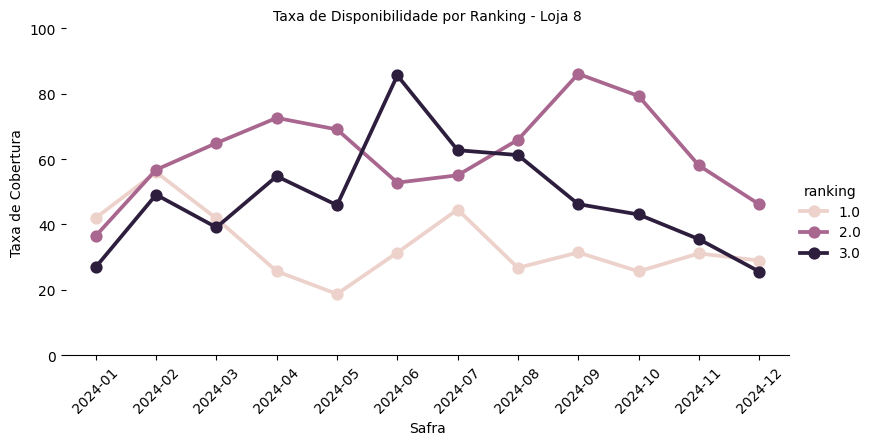

In [65]:
taxa_disponibilidade_por_safra_loja_ranking = (
    df_ruptura_com_similar.groupby(['ano_mes', 'key_loja', 'ranking'], as_index=False)['similar_disponivel']
    .agg(qtd_similares_disponiveis='sum', total='count')
    .assign(taxa_disponibilidade=lambda x: np.round((x['qtd_similares_disponiveis'] / x['total'])*100,2))
    )

lojas = sorted(taxa_disponibilidade_por_safra_loja_ranking['key_loja'].unique())

for lj in lojas:
    df_tmp = taxa_disponibilidade_por_safra_loja_ranking[taxa_disponibilidade_por_safra_loja_ranking['key_loja']==lj]

    create_graph_line_group(df_tmp, f'Taxa de Disponibilidade por Ranking - Loja {lj}', 'ano_mes', 'taxa_disponibilidade', 
                            'ranking', 'Safra', 'Taxa de Cobertura', 0, 100)

## 1.3. Quantas dessas situações resultaram em vendas de similares? -> Fazendo

In [9]:
df_similar_disponivel = df_estoque_ruptura_similar[(df_estoque_ruptura_similar['similar_disponivel']==1)]
df_similar_disponivel

,key_loja,cod_produto,dt_estoque,qt_estoque,is_ruptura,ano_mes,ranking,cod_produto_similar,qt_estoque_similar,similar_disponivel
0,1,1428,2024-01-01,108.0,0,2024-01,1.0,1650.0,102.0,1
1,1,1428,2024-01-01,108.0,0,2024-01,2.0,1640.0,83.0,1
2,1,1428,2024-01-01,108.0,0,2024-01,3.0,48282.0,335.0,1
3,1,1428,2024-01-02,108.0,0,2024-01,1.0,1650.0,102.0,1
4,1,1428,2024-01-02,108.0,0,2024-01,2.0,1640.0,83.0,1
...,...,...,...,...,...,...,...,...,...,...
475193,8,84068,2024-02-06,0.0,1,2024-02,1.0,83772.0,2.0,1
475194,8,84068,2024-02-07,0.0,1,2024-02,1.0,83772.0,2.0,1
475195,8,84068,2024-02-08,0.0,1,2024-02,1.0,83772.0,2.0,1
475196,8,84068,2024-02-09,0.0,1,2024-02,1.0,83772.0,1.0,1


In [10]:
vendas_similares = df_similar_disponivel.merge(
    df_vendas[['dt_venda', 'key_loja', 'cod_produto', 'qtd_vendas']], 
    left_on=['cod_produto_similar', 'key_loja', 'dt_estoque'], 
    right_on=['cod_produto', 'key_loja', 'dt_venda'], how='left',
    suffixes=('', '_similar_venda'))

vendas_similares.drop(columns=['cod_produto_similar_venda'], inplace=True)
vendas_similares['venda_similar'] = vendas_similares['qtd_vendas']>0
vendas_similares['venda_similar'] = vendas_similares['venda_similar'].apply(int)
vendas_similares.head()

,key_loja,cod_produto,dt_estoque,qt_estoque,is_ruptura,ano_mes,ranking,cod_produto_similar,qt_estoque_similar,similar_disponivel,dt_venda,qtd_vendas,venda_similar
0,1,1428,2024-01-01,108.0,0,2024-01,1.0,1650.0,102.0,1,NaT,NaN,0
1,1,1428,2024-01-01,108.0,0,2024-01,2.0,1640.0,83.0,1,NaT,NaN,0
2,1,1428,2024-01-01,108.0,0,2024-01,3.0,48282.0,335.0,1,NaT,NaN,0
3,1,1428,2024-01-02,108.0,0,2024-01,1.0,1650.0,102.0,1,NaT,NaN,0
4,1,1428,2024-01-02,108.0,0,2024-01,2.0,1640.0,83.0,1,NaT,NaN,0


In [16]:
resultado_ruptura_substituicao_similar = vendas_similares[vendas_similares['is_ruptura']==1].groupby(['cod_produto', 'key_loja', 'dt_estoque'],as_index=False)['venda_similar'].max()

rupturas_com_venda_similar = resultado_ruptura_substituicao_similar['venda_similar'].sum()
rupturas_totais_com_similar_disponivel = resultado_ruptura_substituicao_similar.shape[0]

taxa_sucesso_venda_similar = rupturas_com_venda_similar / rupturas_totais_com_similar_disponivel

print(f"Taxa de rupturas cobertas com venda de similar: {taxa_sucesso_venda_similar:.2%}")

Taxa de rupturas cobertas com venda de similar: 37.02%


In [17]:
resultado_ruptura_substituicao_similar['venda_similar'].value_counts(normalize=True)

venda_similar
0    0.629783
1    0.370217
Name: proportion, dtype: float64

Diferença entra taxa de venda de similares com e sem ruptura

In [43]:
resultado_substituicao_similar = vendas_similares.groupby(['dt_estoque', 'key_loja', 'cod_produto', 'is_ruptura'],as_index=False)['venda_similar'].max()

taxa_substituicao_com_sem_ruptura = (
    resultado_substituicao_similar.groupby(['is_ruptura'],as_index=False)['venda_similar']
    .agg(qtd_vendas_similares='sum', total='count')
    .assign(taxa_substituicao=lambda x: np.round((x['qtd_vendas_similares'] / x['total'])*100, 2))
    )

taxa_substituicao_com_sem_ruptura

,is_ruptura,qtd_vendas_similares,total,taxa_substituicao
0,0,32998,75316,43.81
1,1,5882,15888,37.02


In [25]:
from statsmodels.stats.proportion import proportions_ztest

# n1 = total de vendas com ruptura
# x1 = substituições com ruptura
# n2 = total sem ruptura
# x2 = substituições sem ruptura

x1 = taxa_substituicao_com_sem_ruptura[taxa_substituicao_com_sem_ruptura['is_ruptura']==1]['qtd_vendas_similares'].values[0]
n1 = taxa_substituicao_com_sem_ruptura[taxa_substituicao_com_sem_ruptura['is_ruptura']==1]['total'].values[0]

x2 = taxa_substituicao_com_sem_ruptura[taxa_substituicao_com_sem_ruptura['is_ruptura']==0]['qtd_vendas_similares'].values[0]
n2 = taxa_substituicao_com_sem_ruptura[taxa_substituicao_com_sem_ruptura['is_ruptura']==0]['total'].values[0]

stat, pval = proportions_ztest([x1, x2], [n1, n2])
print(f'Estatística: {stat:.4f}, p-valor: {pval:.10f}')

Estatística: -15.7293, p-valor: 0.0000000000


Quando há ruptura, a chance de substituição por outro produto cai significativamente: de 43,8% para 37,0%.

Essa diferença é estatisticamente comprovada (p < 0.0001), o que indica que a ruptura impacta negativamente a substituição — menos pessoas aceitam trocar o produto original por um similar quando há ruptura real.

#### GERAL

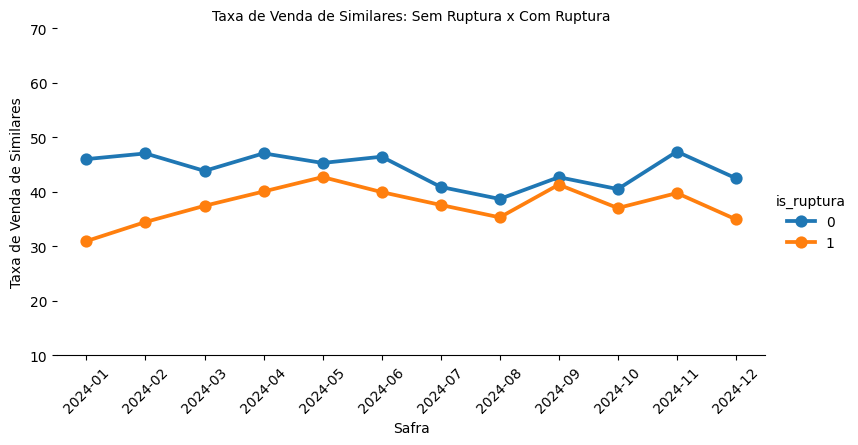

In [53]:
resultado_substituicao_similar['ano_mes'] = resultado_substituicao_similar['dt_estoque'].dt.strftime('%Y-%m')
resultado_vendas_similar_por_safra = (
    resultado_substituicao_similar.groupby(['ano_mes', 'is_ruptura'],as_index=False)['venda_similar']
    .agg(qtd_vendas_similares='sum', total='count')
    .assign(taxa_venda_similares=lambda x: np.round((x['qtd_vendas_similares'] / x['total'])*100,2))
    )

create_graph_line_group(resultado_vendas_similar_por_safra, 'Taxa de Venda de Similares: Sem Ruptura x Com Ruptura', 
                        'ano_mes', 'taxa_venda_similares', 'is_ruptura', 'Safra', 'Taxa de Venda de Similares', 10, 70)

#### LOJA

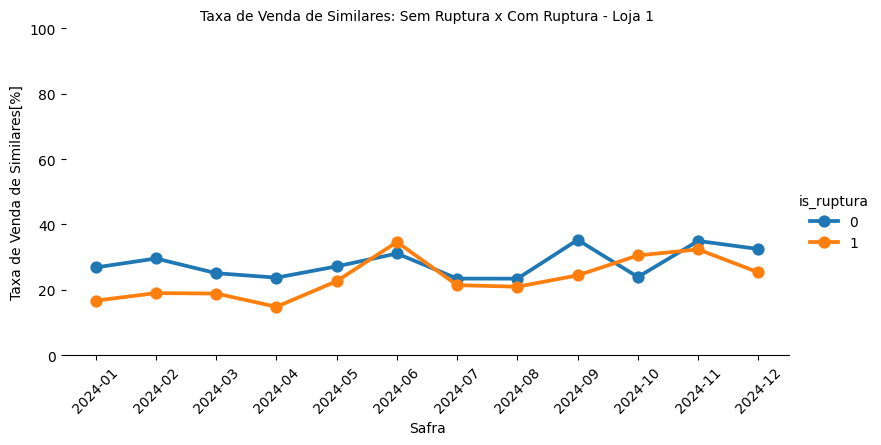

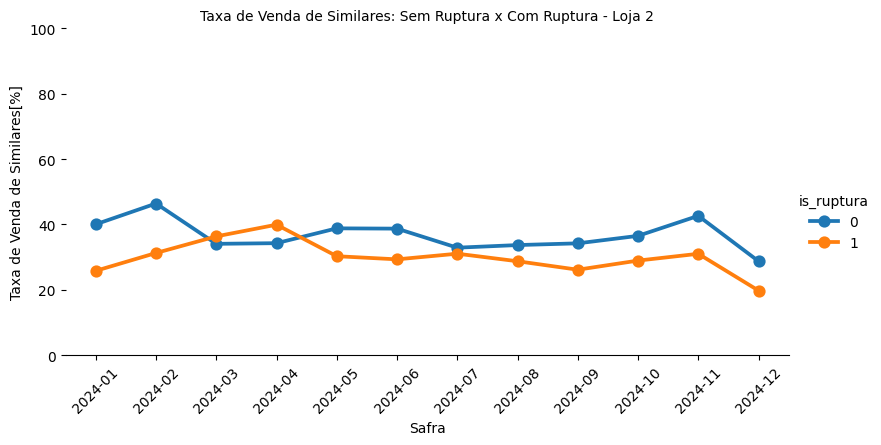

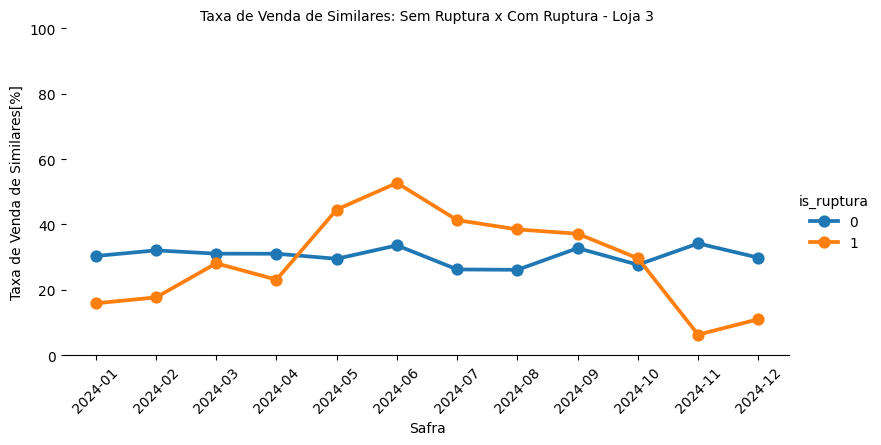

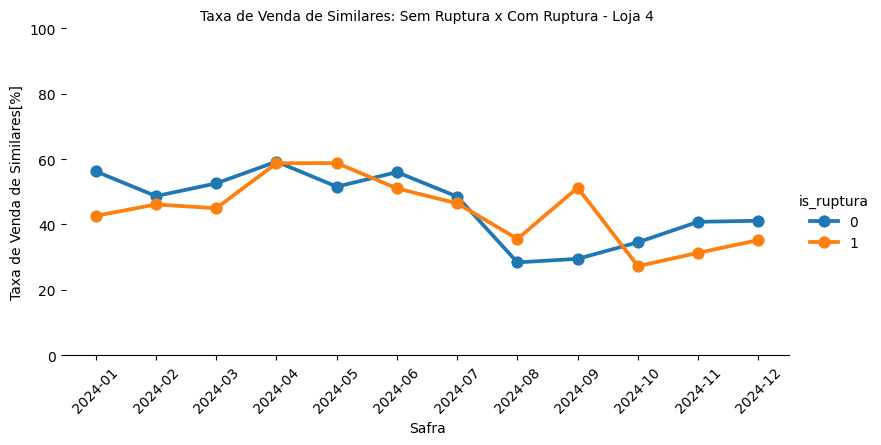

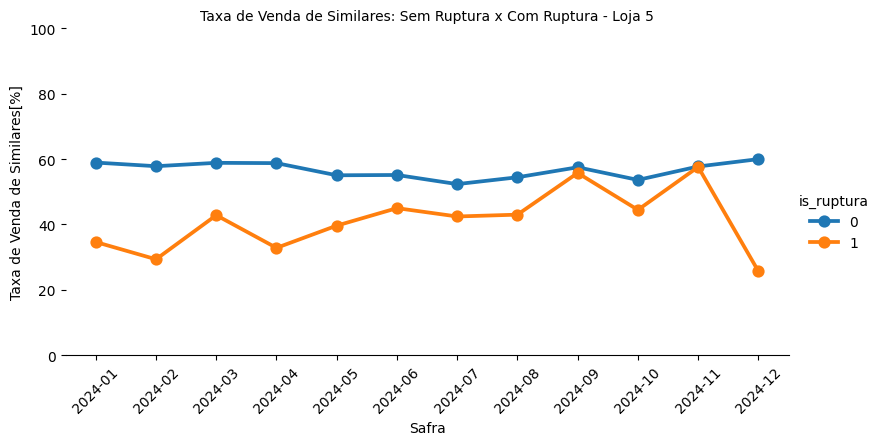

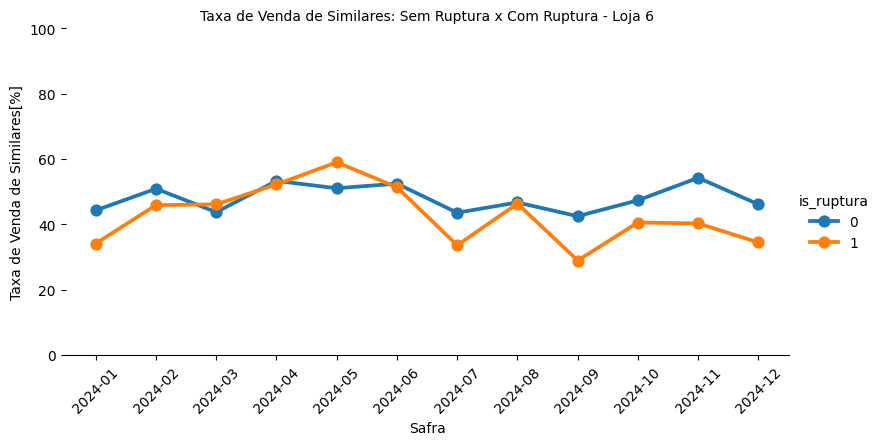

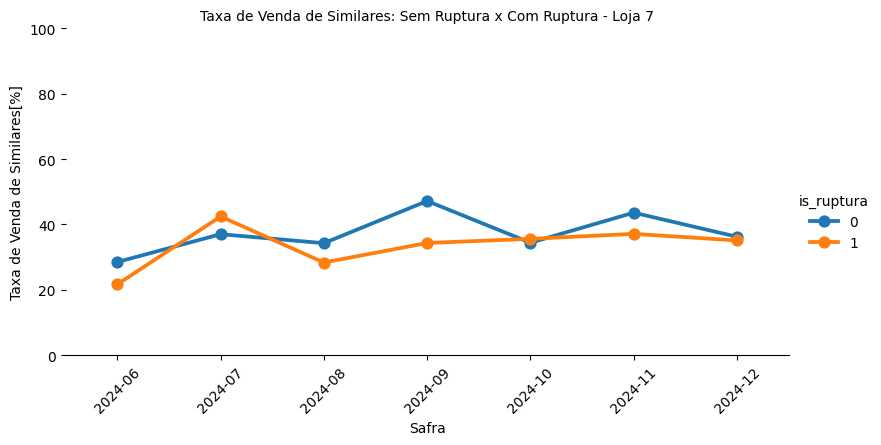

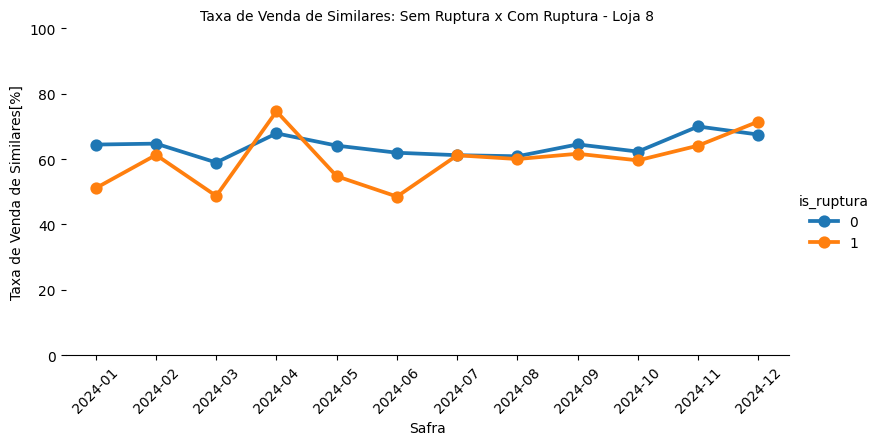

In [59]:
resultado_substituicao_similar
resultado_vendas_similar_por_safra_loja = (
    resultado_substituicao_similar.groupby(['ano_mes', 'key_loja', 'is_ruptura'],as_index=False)['venda_similar']
    .agg(qtd_vendas_similares='sum', total='count')
    .assign(taxa_venda_similares=lambda x: np.round((x['qtd_vendas_similares'] / x['total'])*100,2))
    )

resultado_vendas_similar_por_safra_loja

lojas = sorted(resultado_vendas_similar_por_safra_loja['key_loja'].unique())

for lj in lojas:
    df_tmp = resultado_vendas_similar_por_safra_loja[resultado_vendas_similar_por_safra_loja['key_loja']==lj]
    
    create_graph_line_group(df_tmp, f'Taxa de Venda de Similares: Sem Ruptura x Com Ruptura - Loja {lj}', 
                        'ano_mes', 'taxa_venda_similares', 'is_ruptura', 'Safra', 'Taxa de Venda de Similares[%]', 0, 100)

#### Ranking

In [99]:
resultado_venda_ranking_similar = vendas_similares.groupby(['dt_estoque', 'key_loja', 'cod_produto', 'is_ruptura', 'ranking'],as_index=False)['venda_similar'].max()
taxa_substituicao_com_sem_ruptura_ranking = (
    resultado_venda_ranking_similar.groupby(['is_ruptura', 'ranking'],as_index=False)['venda_similar']
    .agg(qtd_vendas_similares='sum', disponivel='count')
    .assign(taxa_efetividade_venda_similares=lambda x: np.round((x['qtd_vendas_similares'] / x['disponivel'])*100,2))
    )

taxa_substituicao_com_sem_ruptura_ranking

,is_ruptura,ranking,qtd_vendas_similares,disponivel,taxa_efetividade_venda_similares
0,0,1.0,12632,47272,26.72
1,0,2.0,13238,50668,26.13
2,0,3.0,17312,42830,40.42
3,1,1.0,2457,10517,23.36
4,1,2.0,2604,8543,30.48
5,1,3.0,2103,7038,29.88


In [148]:
df_plot = taxa_substituicao_com_sem_ruptura_ranking.pivot(index='ranking', columns='is_ruptura', values='taxa_efetividade_venda_similares')
df_plot
# df_plot.columns = ['sem_ruptura', 'com_ruptura']
# df_plot = df_plot.reset_index()

# import matplotlib.pyplot as plt
# import numpy as np

# # Dados
# x = np.arange(len(df_plot))  # posições no eixo X
# largura = 0.35               # largura das barras

# # Criar gráfico
# fig, ax = plt.subplots(figsize=(10, 6))

# # Barras lado a lado
# barras1 = ax.bar(x - largura/2, df_plot['sem_ruptura'], width=largura, label='Sem Ruptura')
# barras2 = ax.bar(x + largura/2, df_plot['com_ruptura'], width=largura, label='Com Ruptura')

# for barra in barras1:
#     altura = barra.get_height()
#     ax.text(barra.get_x() + barra.get_width()/2, altura + 0.5, f'{altura:.1f}%', ha='center', va='bottom', fontsize=9)

# for barra in barras2:
#     altura = barra.get_height()
#     ax.text(barra.get_x() + barra.get_width()/2, altura + 0.5, f'{altura:.1f}%', ha='center', va='bottom', fontsize=9)


# # Rótulos e estética
# ax.set_xlabel('Ranking')
# ax.set_ylabel('Taxa de Efetividade (%)')
# ax.set_title('Taxa de Efetividade por Ranking (com vs sem ruptura)')
# ax.set_xticks(x)
# ax.set_xticklabels(df_plot['ranking'])
# ax.legend()
# plt.tight_layout()
# plt.show()

is_ruptura,0,1
ranking,,
1.0,26.72,23.36
2.0,26.13,30.48
3.0,40.42,29.88


- **Taxa de Efetividade: Qtd de vezes que o produto / Qtd de vezes que estava disponível**
- É possível observar um preferencia pelo ranking 3 quando não há ruptura do produto
- Quando há ruptura a preferencia está sendo o ranking 2

In [107]:
from statsmodels.stats.proportion import proportions_ztest

# Lista para armazenar os resultados
resultados = []

# Agrupar por ranking
for ranking in taxa_substituicao_com_sem_ruptura_ranking['ranking'].unique():
    dados = taxa_substituicao_com_sem_ruptura_ranking[taxa_substituicao_com_sem_ruptura_ranking['ranking'] == ranking]
    
    # Garantir que temos os dois grupos (ruptura e não ruptura)
    if set(dados['is_ruptura']) == {0, 1}:
        # Extrair valores
        vendas_com_ruptura = dados[dados['is_ruptura'] == 1]['qtd_vendas_similares'].values[0]
        total_com_ruptura = dados[dados['is_ruptura'] == 1]['disponivel'].values[0]
        
        vendas_sem_ruptura = dados[dados['is_ruptura'] == 0]['qtd_vendas_similares'].values[0]
        total_sem_ruptura = dados[dados['is_ruptura'] == 0]['disponivel'].values[0]
        
        # Aplicar teste
        stat, pval = proportions_ztest(
            [vendas_com_ruptura, vendas_sem_ruptura],
            [total_com_ruptura, total_sem_ruptura]
        )
        
        # Salvar resultado
        resultados.append({
            'ranking': ranking,
            'taxa_com_ruptura': np.round((vendas_com_ruptura / total_com_ruptura)*100,2),
            'taxa_sem_ruptura':  np.round((vendas_sem_ruptura / total_sem_ruptura)*100,2),
            'diferenca': np.round((vendas_com_ruptura / total_com_ruptura)*100,2) - np.round((vendas_sem_ruptura / total_sem_ruptura)*100,2),
            'estatistica_z': stat,
            'p_valor': np.round(pval, 5)
        })

df_resultado = pd.DataFrame(resultados)
df_resultado = df_resultado.sort_values('p_valor')
df_resultado

,ranking,taxa_com_ruptura,taxa_sem_ruptura,diferenca,estatistica_z,p_valor
0,1.0,23.36,26.72,-3.36,-7.094739,0.0
1,2.0,30.48,26.13,4.35,8.409731,0.0
2,3.0,29.88,40.42,-10.54,-16.805475,0.0


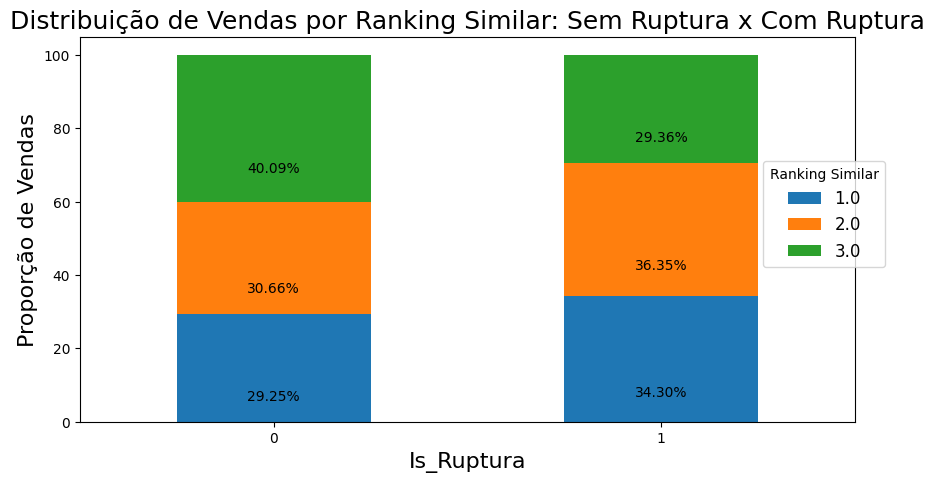

In [121]:
GROUP_QTD = taxa_substituicao_com_sem_ruptura_ranking.pivot(index='is_ruptura', columns='ranking', values='qtd_vendas_similares')
ax = (GROUP_QTD.T*100.0/GROUP_QTD.T.sum()).T.plot(kind='bar',figsize=(10,5),width=0.5,stacked=True, rot=0)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x ,y = p.get_xy()
    ax.annotate('{:.2f}%'.format(height), (x + width/2, y + height*0.2), ha='center')

ax.set_xlabel('Is_Ruptura', fontsize=16)
ax.set_ylabel('Proporção de Vendas', fontsize=16)
plt.legend(title='Ranking Similar', loc='upper right', bbox_to_anchor=(1.05, 0.7), fontsize=12)
plt.title('Distribuição de Vendas por Ranking Similar: Sem Ruptura x Com Ruptura', fontsize=18)
plt.show() 

- Quando olhamos a distribuição de vendas é possivel observar que quando não há ruptura o similar ranking 3 tem mais vendas pode indicar que o cliente quer levar algo parecido, mas não tanto
- Quando há ruptura a taxa de ranking 1 e 2 apresenta um aumento e ranking 3 queda. O que mostra um interesse maior em produtos mais parecidos.
    - O que chama atenção é a proporção do ranking 2 ser levemente maior que ranking 1. Pode indicar um problema de disponibilidade ou de inversão de preferencia

#### Geral por Safra

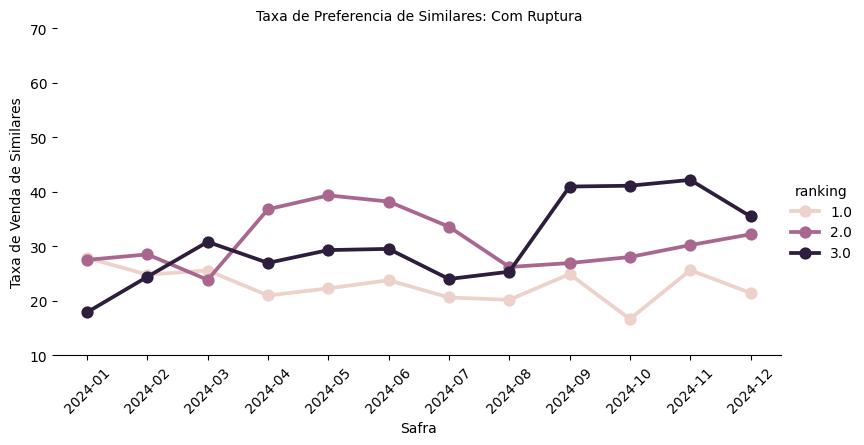

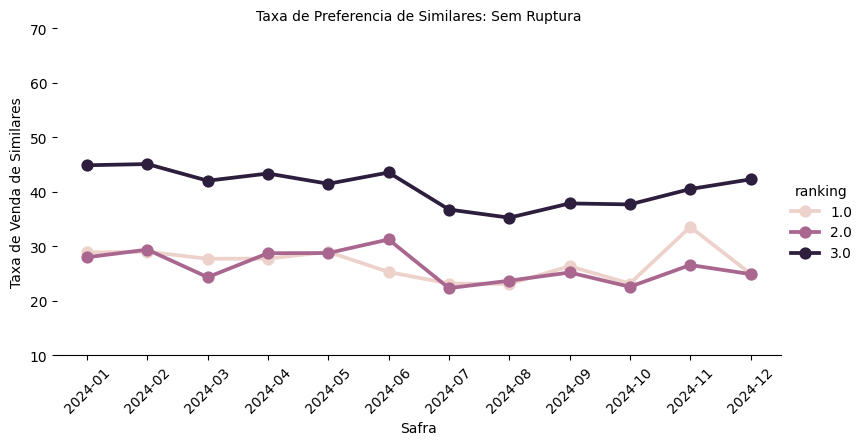

In [137]:
resultado_venda_ranking_similar = vendas_similares.groupby(['dt_estoque', 'key_loja', 'cod_produto', 'is_ruptura', 'ranking'],as_index=False)['venda_similar'].max()
resultado_venda_ranking_similar['ano_mes'] = resultado_venda_ranking_similar['dt_estoque'].dt.strftime('%Y-%m')

taxa_preferencia_com_sem_ruptura_ranking_por_safra = (
    resultado_venda_ranking_similar.groupby(['ano_mes', 'is_ruptura', 'ranking'],as_index=False)['venda_similar']
    .agg(qtd_vendas_similares='sum', disponivel='count')
    .assign(taxa_preferencia_venda_similares=lambda x: np.round((x['qtd_vendas_similares'] / x['disponivel'])*100,2))
    )

taxa_preferencia_com_sem_ruptura_ranking_por_safra

create_graph_line_group(taxa_preferencia_com_sem_ruptura_ranking_por_safra[taxa_preferencia_com_sem_ruptura_ranking_por_safra['is_ruptura']==1], 
                        'Taxa de Preferencia de Similares: Com Ruptura', 'ano_mes', 'taxa_preferencia_venda_similares', 'ranking', 'Safra', 'Taxa de Venda de Similares', 10, 70)

create_graph_line_group(taxa_preferencia_com_sem_ruptura_ranking_por_safra[taxa_preferencia_com_sem_ruptura_ranking_por_safra['is_ruptura']==0], 
                        'Taxa de Preferencia de Similares: Sem Ruptura', 'ano_mes', 'taxa_preferencia_venda_similares', 'ranking', 'Safra', 'Taxa de Venda de Similares', 10, 70)

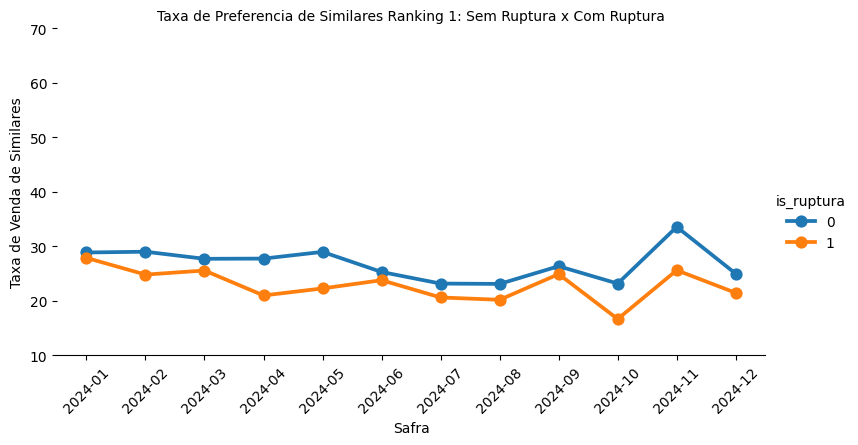

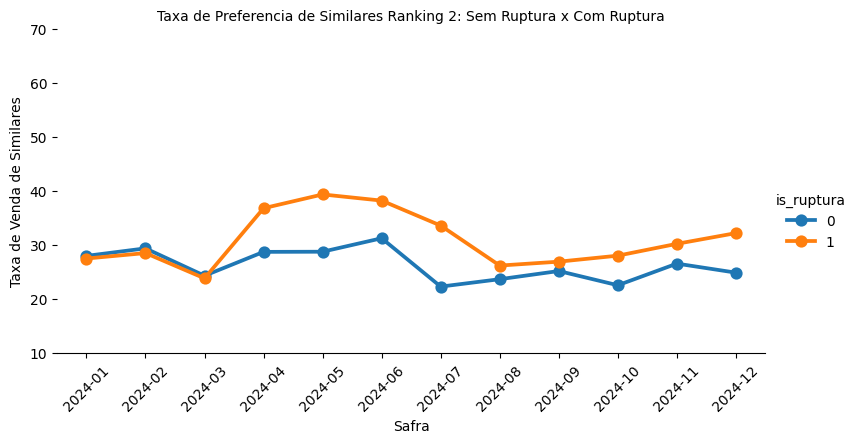

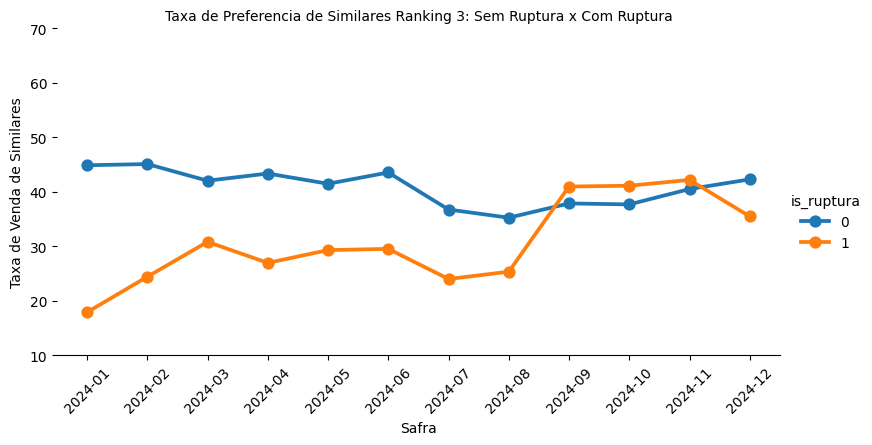

In [147]:
for rank in taxa_preferencia_com_sem_ruptura_ranking_por_safra['ranking'].unique():
    df_tmp = taxa_preferencia_com_sem_ruptura_ranking_por_safra[taxa_preferencia_com_sem_ruptura_ranking_por_safra['ranking']==rank]
    create_graph_line_group(df_tmp, f'Taxa de Preferencia de Similares Ranking {int(rank)}: Sem Ruptura x Com Ruptura', 
                            'ano_mes', 'taxa_preferencia_venda_similares', 'is_ruptura', 'Safra', 'Taxa de Venda de Similares', 10, 70)

In [ ]:
#### LOJA

In [ ]:
# ==================================================================================

#### GERAL

In [ ]:
vendas_similar_por_safra = (
    rupturas_similares_vendas
    .groupby(['ano_mes', 'cod_produto', 'key_loja', 'dt_estoque'])['venda_similar']
    .max()
    .reset_index()
    )

resultado_vendas_similar_por_safra = (
    vendas_similar_por_safra.groupby('ano_mes')['venda_similar']
    .agg(qtd_vendas_similares='sum', total='count')
    .assign(taxa_cobertura=lambda x: np.round((x['qtd_vendas_similares'] / x['total'])*100,2))
    .reset_index()
    )

create_graph_line(resultado_vendas_similar_por_safra, 'Taxa de Cobertura com Vendas de Similares', 'ano_mes', 'taxa_cobertura', 'Safra', 'Taxa de Cobertura com Vendas', 0, 80)

#### LOJA

In [ ]:
resultado_vendas_similar_por_safra_loja = (
    vendas_similar_por_safra.groupby(['ano_mes', 'key_loja'], as_index=False)['venda_similar']
    .agg(qtd_vendas_similares='sum', total='count')
    .assign(taxa_cobertura_com_venda=lambda x: np.round((x['qtd_vendas_similares'] / x['total'])*100,2))
    )

lojas = resultado_vendas_similar_por_safra_loja['key_loja'].unique()

for lj in lojas:
    df_tmp = resultado_vendas_similar_por_safra_loja[resultado_vendas_similar_por_safra_loja['key_loja']==lj]
    create_graph_line(df_tmp, f'Taxa de Cobertura com Venda na Loja {lj}', 'ano_mes', 'taxa_cobertura_com_venda', 'Safra', 'Taxa de Cobertura com Venda', 0, 80)

#### RANKING

In [ ]:
vendas_similar_por_safra_ranking = (
    rupturas_similares_vendas
    .groupby(['ano_mes', 'cod_produto', 'key_loja', 'ranking', 'dt_estoque'])['venda_similar']
    .max()
    .reset_index()
    )

vendas_similar_por_safra_ranking

In [ ]:
resultado_vendas_similar_ranking = (
    vendas_similar_por_safra.groupby('ranking')['venda_similar']
    .agg(qtd_vendas_similares='sum', total='count')
    .assign(taxa_cobertura_com_venda=lambda x: np.round((x['qtd_vendas_similares'] / x['total'])*100,2))
    .reset_index()
    )

create_graph_bar(resultado_vendas_similar_ranking, 'ranking', 'taxa_cobertura_com_venda', 'Ranking Similar', 'Taxa Cobertura com Venda [%]', 'Ranking Similar - Cobertura com Venda')

In [ ]:
ranking_mais_vendidos = vendas_similar_por_safra[vendas_similar_por_safra['venda_similar']==True]['ranking'].value_counts(normalize=True).reset_index()
ranking_mais_vendidos['proportion'] = (ranking_mais_vendidos['proportion'] * 100).round(2)

create_graph_bar(ranking_mais_vendidos, 'ranking', 'proportion', 'Ranking Similar', 'Taxa de Vendas [%]', 'Ranking mais Vendidos')

In [ ]:
vendas_por_safra_rank = (
    vendas_similar_por_safra.groupby(['ano_mes', 'key_loja', 'ranking'], as_index=False)['venda_similar']
    .agg(qtd_similares_venda='sum', total='count')
    .assign(taxa_cobertura_com_venda=lambda x: np.round((x['qtd_similares_venda'] / x['total'])*100,2))
    )

vendas_por_safra_rank

lojas = sorted(vendas_por_safra_rank['key_loja'].unique())

for lj in lojas:
    df_tmp = vendas_por_safra_rank[vendas_por_safra_rank['key_loja']==lj]

    create_graph_line_group(df_tmp, f'Taxa de Cobertura com Venda por Ranking - Loja {lj}', 'ano_mes', 'taxa_cobertura_com_venda', 'ranking', 'Safra', 'Taxa de Cobertura com Venda', 0, 100)

# Em que contextos os similares são mais aceitos?

## 2.3. Há variação por categoria, subcategoria ou linha do produto? ->

- Alguns produtos paresentam mais de uma categoria na base de vendas, com isso para evitar duplicatas vou filtrar subcategoria e linha de produto

- Em um cenário real o ideal seria conferir com os responsáveis por esses dados qual categoria devo considerar e assim utilizar a informação

In [ ]:
df_desc_prod = df_vendas[['cod_produto', 'sub_categoria_produto', 'linha_produto']].drop_duplicates()

In [ ]:
df_desc_prod['cod_produto'].value_counts()

In [ ]:
df_rup_sim_disp = df_ruptura_similar[(df_ruptura_similar['is_ruptura']==1)&(df_ruptura_similar['similar_disponivel']==1)]
df_rup_sim_disp.shape

In [ ]:
df_rup_sim_disp = df_rup_sim_disp.merge(df_desc_prod, on=['cod_produto'],how='left')
df_rup_sim_disp.head()

In [ ]:
df_rup_sim_disp.shape

In [ ]:
rupturas_similares_vendas = df_rup_sim_disp.merge(
    df_vendas,
    left_on=['cod_produto_similar', 'key_loja', 'dt_estoque'],
    right_on=['cod_produto', 'key_loja', 'dt_venda'],
    how='left',
    suffixes=('', '_venda')
)

# Criar flag: houve venda do similar?
rupturas_similares_vendas['venda_similar'] = ~rupturas_similares_vendas['cod_pedido'].isna()
rupturas_similares_vendas.head()

In [ ]:
# Obter 1 linha por ruptura com info de produto e flag de venda
rupturas_agrupadas = (
    rupturas_similares_vendas
    .groupby(['cod_produto', 'key_loja', 'dt_estoque', 'sub_categoria_produto', 'linha_produto'])['venda_similar']
    .max()
    .reset_index()
)
rupturas_agrupadas

In [ ]:
taxa_por_sub_categoria = (
    rupturas_agrupadas
    .groupby('sub_categoria_produto')['venda_similar']
    .agg(['count', 'sum'])
    .reset_index()
    .rename(columns={'count': 'rupturas_com_similar', 'sum': 'substituicoes'})
)
taxa_por_sub_categoria['taxa_substituicao'] = taxa_por_sub_categoria['substituicoes'] / taxa_por_sub_categoria['rupturas_com_similar'] * 100
taxa_por_sub_categoria

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Usar base agrupada com 1 linha por ruptura
# com flag venda_similar = True ou False
# e coluna categoria_produto

# Criar tabela de contingência
contingencia = pd.crosstab(rupturas_agrupadas['sub_categoria_produto'], rupturas_agrupadas['venda_similar'])

chi2, p, dof, expected = chi2_contingency(contingencia)

print(f"Estatística Qui-quadrado: {chi2:.2f}")
print(f"p-valor: {p:.4f}")

if p < 0.05:
    print("Conclusão: Há diferença estatisticamente significativa entre as sub_categoria_produto quanto à taxa de substituição.")
else:
    print("Conclusão: Não há diferença estatística significativa entre as sub_categoria_produto.")

In [ ]:
taxa_por_linha_produto = (
    rupturas_agrupadas
    .groupby('linha_produto')['venda_similar']
    .agg(['count', 'sum'])
    .reset_index()
    .rename(columns={'count': 'rupturas_com_similar', 'sum': 'substituicoes'})
)
taxa_por_linha_produto['taxa_substituicao'] = taxa_por_linha_produto['substituicoes'] / taxa_por_linha_produto['rupturas_com_similar'] * 100
taxa_por_linha_produto

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Usar base agrupada com 1 linha por ruptura
# com flag venda_similar = True ou False
# e coluna categoria_produto

# Criar tabela de contingência
contingencia = pd.crosstab(rupturas_agrupadas['linha_produto'], rupturas_agrupadas['venda_similar'])

chi2, p, dof, expected = chi2_contingency(contingencia)

print(f"Estatística Qui-quadrado: {chi2:.2f}")
print(f"p-valor: {p:.4f}")

if p < 0.05:
    print("Conclusão: Há diferença estatisticamente significativa entre as linha_produto quanto à taxa de substituição.")
else:
    print("Conclusão: Não há diferença estatística significativa entre as linha_produto.")

## 2.4. O preço do similar afeta a substituição? (mais barato = mais aceito?) ->